ADVANCE MACHINE LEARNING

LAB-1

PRANSHU PARATE

202211063

In [1]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from __future__ import division
sns.set_style("whitegrid")
sns.set_context(font_scale=5)
HEADS = 0.5
TAILS = 0.5

EPSILON = .4 # large tolerance because sample size is small
E_OUT = .5 # law of large numbers

N_COINS = 1000
N_FLIPS = 10
N_RUNS = 100000

def hoeffding(epsilon, N=N_FLIPS): 
    return 2 * np.exp(-2 * (epsilon**2) * N)

hoeffding(EPSILON,N_FLIPS)


0.08152440795673238

In [3]:
def run():
    flips = np.random.randint(2, size = (N_COINS, N_FLIPS))
    c1 = flips[0]
    c_rand = flips[np.random.randint(N_COINS)]

    heads_count = np.count_nonzero(flips, axis=1)
    c_min = flips[np.argmin(heads_count)]

    v1 = c1.sum() / N_FLIPS
    v_rand = c_rand.sum() / N_FLIPS
    v_min = c_min.sum() / N_FLIPS
    
    return np.array([v1, v_rand, v_min])

a)

In [4]:
v  = np.array([run() for _ in range(N_RUNS)])

print('Average values = ', np.mean(v, axis=0))

Average values =  [0.499667 0.500026 0.03776 ]


In [5]:
def conduct_experiment(p, n_flips, n_coins, n_trials):
    
   
    
    # Get an n_trials x n_coins matrix
    outcome = np.random.binomial(n_flips, p, (n_trials, n_coins))
    
    # First coin in every trial
    v_1s = outcome[:, 0]  
    
    # Coin with minimum number of heads for every trial
    v_mins = outcome.min(axis=1) 
    
    # Random coin from every trial
    v_rands = np.apply_along_axis(np.random.choice, 1, outcome) 

    return (v_1s, v_mins, v_rands)

In [6]:
P = 0.5
v_1s, v_mins, v_rands = conduct_experiment(P, N_FLIPS, N_COINS, N_RUNS)

b)

In [7]:
def plot_dist(x, bins=10): 
    sns.distplot(
        x,
        hist=True,
        bins=bins, 
        hist_kws={"align": "left"},
        kde_kws={"bw": 1,"shade": True}
    );

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/loca

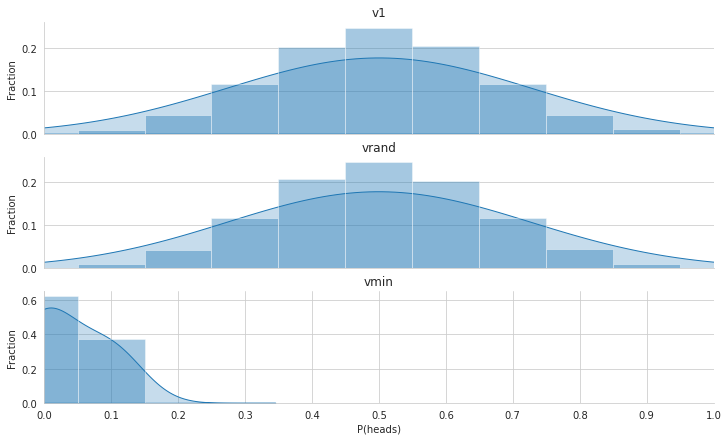

In [8]:
plt.figure(figsize=(12,7))
plt.subplot(3,1,1)
plot_dist(v_1s);
plt.ylabel("Fraction")
plt.title("v1");
plt.xlim(0,10)
plt.xticks([])

plt.subplot(3,1,2)
plot_dist(v_rands);
plt.ylabel("Fraction");
plt.title("vrand");
plt.xlim(0,10)
plt.xticks([])

plt.subplot(3,1,3)
plot_dist(v_mins, bins=2);
plt.xlabel("P(heads)");
plt.ylabel("Fraction");
plt.title("vmin");
plt.xlim(0,10)
sns.despine()

plt.xticks(np.arange(11), np.arange(11)/10);

In [9]:
def p_big_error(v, mu, epsilon):
    return (np.abs(v - mu)/N_FLIPS > epsilon).mean()

In [10]:
epsilons = np.linspace(0,10,100)/N_FLIPS

c)

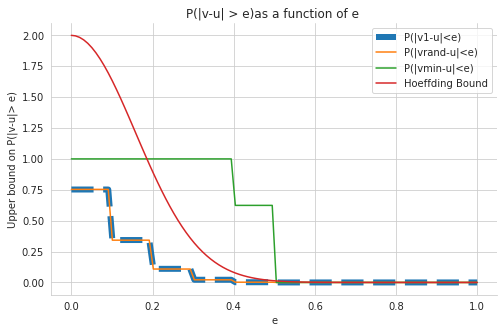

In [12]:
c1_errs = [p_big_error(v_1s, 5, e) for e in epsilons]
c_rand_errs = [p_big_error(v_rands, 5, e) for e in epsilons]
c_min_errs = [p_big_error(v_mins, 5, e) for e in epsilons]

plt.figure(figsize=(8,5));
plt.plot(epsilons, c1_errs, linewidth=6, linestyle= "--");
plt.plot(epsilons, c_rand_errs);
plt.plot(epsilons, c_min_errs);
plt.plot(epsilons, np.apply_along_axis(hoeffding, 0, epsilons));
plt.legend(
    [
        "P(|v1-u|<e)",
        "P(|vrand-u|<e)",
        "P(|vmin-u|<e)",
        "Hoeffding Bound"
    ]
);
sns.despine();
plt.xlabel("e");
plt.ylabel("Upper bound on P(|v-u|> e)");
plt.title("P(|v-u| > e)as a function of e ");

d) We can see from the plot that vrand and vfirst obey the Hoeffding inequality, but vmin does not obey it. It is because vmin was specifically chosen from a set of 100,000 samples based on the sample results.

